## Lending Club Case Study

#### Importing the libraries which will be reuired to get the required outcomes

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading data and getting a brief look into it

In [50]:
Ldata = pd.read_csv("loan.csv",low_memory=False)
Ldata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


* This is how our Data looks like.

####  Fetch some info about data

In [51]:
print("Shape of data is :",Ldata.shape)
print("*"*100)
Ldata.info()

Shape of data is : (39717, 111)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


##### Observations:

1. Shape of data is (39717, 111) means in our data set we have 39717 rows and 111 columns. Each row has info about loans taken by individuals.
2. In above output , column consist the name of the column , Non-null Count means How many non-null values we have in that column , Dtype means What type of value that column consits ( int64 means int value , float64 means float value, object means string value)

#### Delete some columns which have no releavant values

Some Columns like 'pymnt_plan', 'initial_list_status' have the same values in all rows and these columns will not help us in any way to identify the driving factors for this analysis so we can simply remove them to reduce the column numbers and get refined data.

In [52]:
Ldata.drop(Ldata.columns[[1,17,18,19,22,35,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,
                       72,73,74,75,76,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,
                       101,102,103,104,107,108,109,110]],axis=1,inplace=True)
Ldata.head()                       

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0.0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,0.0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0.0,0.0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0.0,0.0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,0.0,0.0,0.0


In [53]:
Ldata.drop(Ldata.index[Ldata['loan_status'] == 'Current'], inplace=True)
print("Shape of data is :",Ldata.shape)

Shape of data is : (38577, 47)


#### Fetch some info about numerical features by .describe()

In [54]:
Ldata.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
count,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,13672.000000,...,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38521.0,38521.0,37880.000000,38538.0
mean,6.763787e+05,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.146668,0.871737,35.882534,...,9648.322898,2119.243370,1.368634,98.035545,12.772728,2746.243218,0.0,0.0,0.043479,0.0
std,2.092639e+05,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.492271,1.071546,22.028093,...,7009.381200,2389.499511,7.315880,698.650182,150.836853,4494.648131,0.0,0.0,0.204583,0.0
min,5.473400e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
25%,5.120330e+05,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,18.000000,...,4500.000000,643.990000,0.000000,0.000000,0.000000,217.420000,0.0,0.0,0.000000,0.0
50%,6.564230e+05,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,34.000000,...,8000.000000,1300.450000,0.000000,0.000000,0.000000,568.260000,0.0,0.0,0.000000,0.0
75%,8.291460e+05,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,52.000000,...,13175.000000,2671.980000,0.000000,0.000000,0.000000,3447.250000,0.0,0.0,0.000000,0.0
max,1.077501e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,...,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,0.0,2.000000,0.0


##### Observations:

1. Here some features are not necessary like passengerId. so we will ignore that. Only features which can be consider as numerical and need to analysis as numerical features are Age & Fare.

2. In Age feature we can see count is as 714 it means for 714 persons we have age value, else are missing. We have seen this above right.??. We have Mean as 29.69 , It means The mean age of all the passengers is 29.69 Years. Std (stander deviation ) as 14.52 It means most of the people have age in the range (29.69-14.52) to (29.69+14.52) because in a continuous Random Variable most of the values can be found in the range of (mean-std) to (mean+std). The min age as 0.42 in above image so It means out of all passengers we have 0.4 years old as the minimum age of any passenger. And We have 25% value(25th Percentile value) as 20.12 years It means 25% of passengers have Age less than 20.12 years. same we have 50%value (50th percentile value) as 28.00 It Means 50% of the passengers have age less than 28.00 years. same as 75% value (75th percentile value) we have as 38.00 It means 75% people has Age less than 38.00 years. Max value we can see as 80.00 years It Means out of all passengers the Highest aged person has age 80.00 Years.

3. Same like Age feature Analysis , you can analyze Fare feature.

#### Getting a brief idea on Fully Paid and Charged Off loans

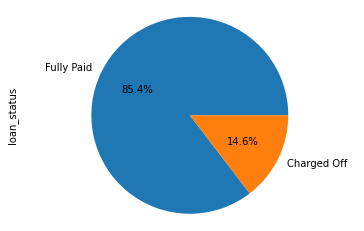

In [55]:
Ldata['loan_status'].value_counts().plot.pie(autopct='%1.1f%%',)
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='count'>

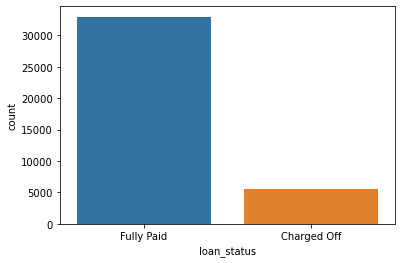

In [56]:
sns.countplot(x=Ldata["loan_status"],data = Ldata)

Observation from above two charts:

From the pie chart it can be observed that around 14.5% of the cases are 'Default' and from the bar chart it can be seen that almost 5K loans are default.

In [ ]:
#Converting the loan_status to value 0 and 1 so that it can be utilized for barplots

In [58]:
Ldata['loan_status_update'] = Ldata['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
Ldata['loan_status_update'] = Ldata['loan_status_update'].apply(lambda x: pd.to_numeric(x))

#### We can now plot few fields against loan status to get an idea of default based on those fields

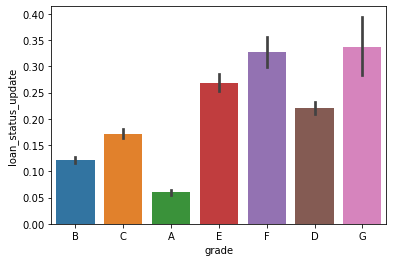

In [59]:
# Comparison chart 1: plotting loan status against grade
sns.barplot(x='grade', y='loan_status_update', data=Ldata)
plt.show()

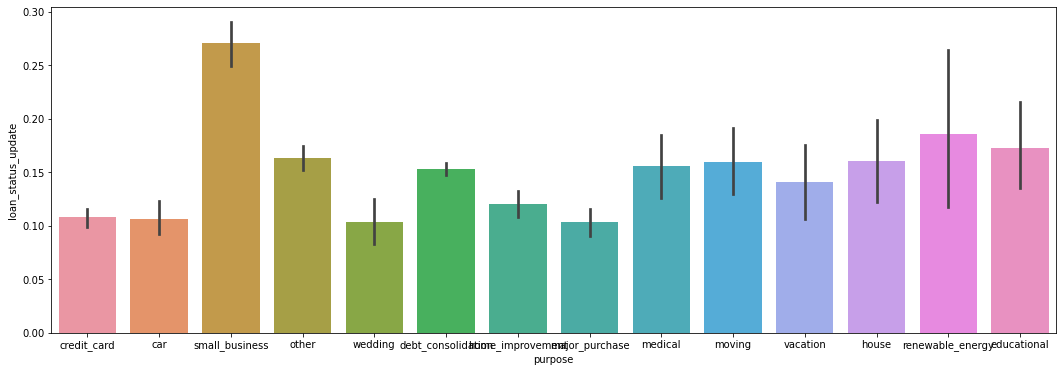

In [60]:
# Comparison chart 2: plotting loan status against purpose
plt.figure(figsize=(18, 6))
sns.barplot(x='purpose', y='loan_status_update', data=Ldata)
plt.show()

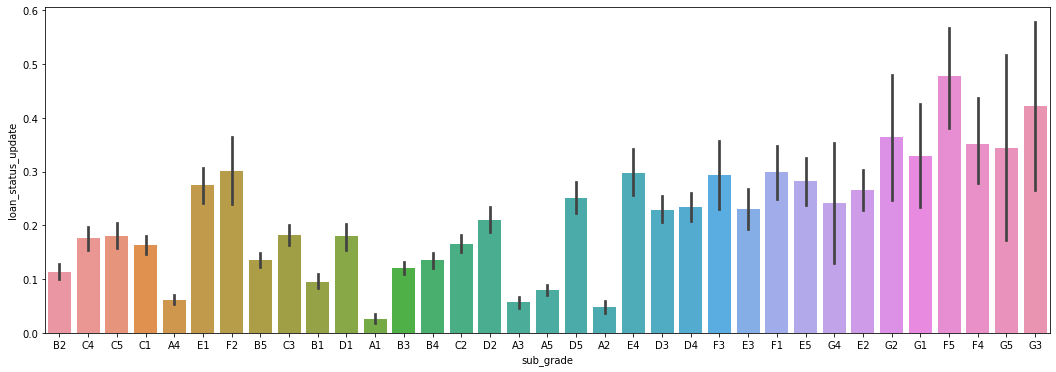

In [61]:
# Comparison chart 3: plotting loan status against sub_grade
plt.figure(figsize=(18, 6))
sns.barplot(x='sub_grade', y='loan_status_update', data=Ldata)
plt.show()

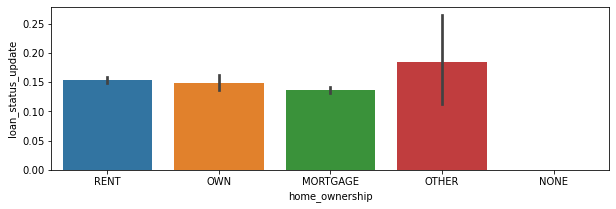

In [62]:
# Comparison chart 4: plotting loan status against home_ownership
plt.figure(figsize=(10, 3))
sns.barplot(x='home_ownership', y='loan_status_update', data=Ldata)
plt.show()

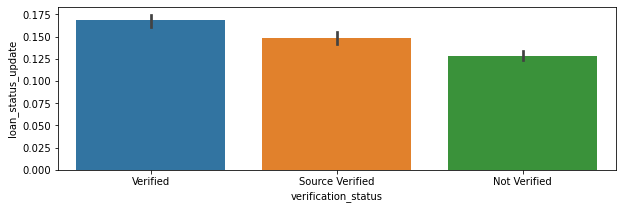

In [63]:
# Comparison chart 5: plotting loan status against verification_status
plt.figure(figsize=(10, 3))
sns.barplot(x='verification_status', y='loan_status_update', data=Ldata)
plt.show()

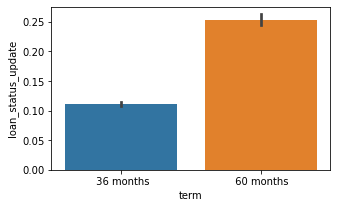

In [75]:
# Comparison chart 6: plotting loan status against term
plt.figure(figsize=(5, 3))
sns.barplot(x='term', y='loan_status_update', data=Ldata)
plt.show()

##### Observations-

From the above charts we have the following observations:

* Chart 1: Grade G, F and E have high volume of defaults. Grade G has the highest default rate and grade A has lowest rate
* Chart 2: This is a plot for default rate against the purpose of loan. Purpose of loan in this data is categorical in nature. From the chart it can be easily observed that small business has very high default rate as compared to others and Wedding is that category where default rate is lowest
* Chart 3: This chart compares sub grade to default rate. Here 'F5' clearly has hight default as compared to others and 'A1' falls to the lowest.
* Chart 4: This chart compares home ownership with default rates and as seen there is not much difference in rates.
* Chart 5: It is the plot of Verification status against defaulr rate. The loans which are verified have less chances of default as compared to those which are verified.
* Chart 6: This chart shows the default rates against tenure of loan and it can be observed that as the term increased the loan default also increases.

### Analysis with multiple variables

#### Lets now derive few columns based on the existing columns which will help us to further take out some more outcomes

In [66]:
## If we look at the data in loan amount column, we have minimum 500 and maximum 35000. Categorizing based on this range.
def loan_grouping(x):
    if x < 10000:
        return 'Less 10K'
    elif x >=10000 and x < 20000:
        return '10K-20K'
    else:
        return 'Greater 20K'

Ldata['loan_amnt_group'] = Ldata['loan_amnt'].apply(lambda x: loan_grouping(x))

In [68]:
print("Shape of data is :",Ldata.shape)

Shape of data is : (38577, 49)


In [69]:
Ldata.head() 

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens,loan_status_update,loan_amnt_group
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,Jan-15,171.62,NaN,May-16,0.0,0.0,0.0,0.0,0,Less 10K
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,Apr-13,119.66,NaN,Sep-13,0.0,0.0,0.0,0.0,1,Less 10K
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,Jun-14,649.91,NaN,May-16,0.0,0.0,0.0,0.0,0,Less 10K
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,Jan-15,357.48,NaN,Apr-16,0.0,0.0,0.0,0.0,0,10K-20K
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,...,Jan-15,161.03,NaN,Jan-16,0.0,0.0,0.0,0.0,0,Less 10K


<AxesSubplot:xlabel='loan_amnt_group', ylabel='count'>

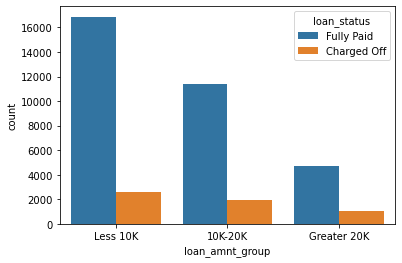

In [74]:
# Countplot counts the each category of value and plot that.
sns.countplot(x=Ldata["loan_amnt_group"],hue = Ldata["loan_status"],data = Ldata)


##### Observations:

* As we increase the loan amount the number of loans in decreasing and one more thing that can e observed is that the ratio of default is also increasing as we are moving to higher loan amounts. The percentage of default in case of loan amount 'Greater 20K' is more as compared to other categories.

#### 2. Pclass- Feature

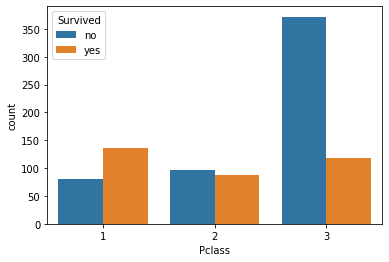

In [10]:
sns.countplot(data["Pclass"],hue = data["Survived"],data = data)

##### Observations-

* i have heard or read some where there is not any value of poor people lives😥. Same concept is applying here. In above output plot we can see Persons who were travelling in 3rd class , mostly of them died or can not survived than other class passengers.
* Persons who were travelling in 2nd class, out of them almost equal number of people died and survived.
* Persons who were travelling in 1st class, out of them large number of people survived and also fair number of persons died.
* So as the conclusion we can say that person who were travelling in lower class like 3rd has higher chances to died. & persons who were travelling in higher class like 1st has higher chance to survive.

#### 3.Sex- Feature

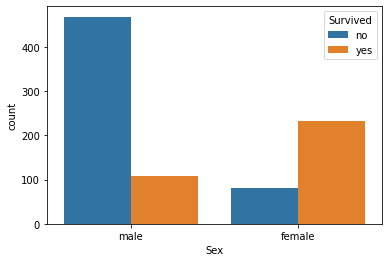

In [11]:
sns.countplot(data["Sex"],hue = data["Survived"],data = data)

##### Observstions-

* As we can see in above plot Out of all male passengers mostly of them died. And out of all Female passengers most of them survived.
* So as the conclusion we can say male passenger has higher chances to die and female passengers has higher chance to survive.Or Because of Ladies First policy , priorities were given to female passengers so the chances of survival for female passengers is increased than male passengers.

#### 4.Age-Feature- 

* Age feature consist some null values so first we need to handle that. Here i am filling the null values with median of Age Feature. we know that the median of Age feature is 28.
* Age is a numerical feature so we can’t plot a count plot for Age feature. we need to plot pdf for Age Feature.

/home/murtuza/miniconda3/envs/idp3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


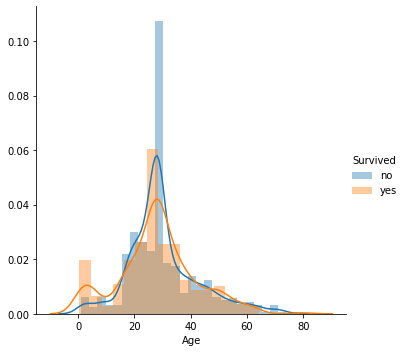

In [12]:
# Filling null Values
data = data.fillna(28)

# plotting Pdfs
sns.FacetGrid(data, hue="Survived", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend()
plt.show()

##### Observations-

* Pdfs are almost overlapping on each other. so we can not conclude anything big clearly. but some of the conclusions are listed bellow.
* Passengers who have age <20 years so child's or teenagers , out of them numbers of passengers who survived is greater than numbers of people who died. Means while Rescuing priorities were given to child's or teenagers.
* Persons who have age >20 years and <45 years. Out of them numbers of passengers who died is greater than numbers of passengers who survived.
* Rest of the pdfs are overlapping much so we will not struggle here much to get some info. But people with age greater then 65 almost all of them died. it could be because of various reasons like people leave them on their luck or they died because of cold water of Atlantic Ocean of that time.. etc..

#### 5. Fare feature 

/home/murtuza/miniconda3/envs/idp3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


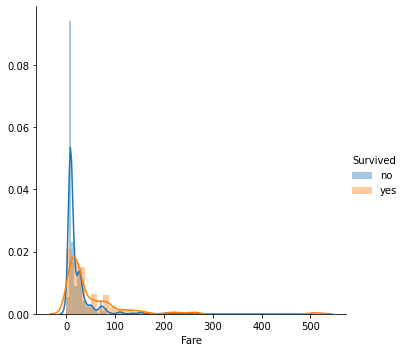

In [13]:
sns.FacetGrid(data, hue="Survived", size=5) \
   .map(sns.distplot, "Fare") \
   .add_legend();
plt.show();

##### Observations-

* Passengers who paid low fair has a higher chances to die. On the other hand passengers who paid high fair has a higher chance to survive.This observation is same like pclass persons who were rich has higher chance to survive and poor lower chance to survive.

##  Some Important things here to know.

* The Data set we have consists 12 features But we are doing uni-variate analysis only on 8 features because rest 4 features are useless os not give much information to us. for e.g feature PassengerId and Passenger name,tickets these to features are not useful for prediction so its better to drop theme from dataset. And in the cabin data set we have 77% null values so it is not trivial to handle cabin feature that’s why i am drooping these 4 features from my data set.

In [14]:
# You can drop those 4 features from data set with this code.
data = data.drop(["PassengerId", "Name" , "Ticket" , "Cabin"],axis = 1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,no,3,male,22.0,1,0,7.2500,S
1,yes,1,female,38.0,1,0,71.2833,C
2,yes,3,female,26.0,0,0,7.9250,S
3,yes,1,female,35.0,1,0,53.1000,S
4,no,3,male,35.0,0,0,8.0500,S


### Conclusion

* The P-value is very low and it's safe to reject the null hypothesis.
* The conclusion is that the provided sample proves a significant correlation between the socioeconomic class and the survival rate.
* Similarly you can do different types of hypothesis test on the variables like:
    * Chi Square test to check significance between gender and survival rate
    * Chi Square test to check significance between different age group and survival rate

# THANK YOU !